## Enrichment analysis and GO plots 

It is crucial to understand the functional significance of the list of genes identified by high-throughput genomic methods. Enrichment analysis (or pathway analysis) can identify terms which are statistically over-or under-represented within the list of interest, by systematically mapping genes and proteins to their associated biological annotations (such as gene ontology GO terms or pathway membership) and then comparing the distribution of the terms within a gene set of interest with the background distribution of these terms (eg all genes represented on a microarray chip). 

In this template the enrichment if performed using WEBgestalt in R and the visualization is done with the GOplot package.

Zhang, B., Kirov, S.A., Snoddy, J.R. (2005). WebGestalt: an integrated system for exploring gene sets in various biological contexts. Nucleic Acids Res, 33(Web Server issue), W741-748.
Walter, Wencke, Fátima Sánchez-Cabo, and Mercedes Ricote. "GOplot: an R package for visually combining expression data with functional analysis." Bioinformatics (2015): btv300. 

In [1]:
library(WebGestaltR)

******************************************


*                                        *


*          Welcome to WebGestaltR !      *


*                                        *


******************************************




**Results obtained in the meta analysis from expression data are explored here.**

In [14]:
infiles <- list.files(path="/home/guess/MetaAnalysis/GeneExprMeta", # folder with log files
                      pattern=".result.",
                      full.names = TRUE)

In [15]:
infiles

[1] "/home/guess/MetaAnalysis/GeneExprMeta/metaP_GSEresult_case_control"
[2] "/home/guess/MetaAnalysis/GeneExprMeta/meta_result_case-ctl"

In [5]:
meta.results<-read.table("/home/guess/MetaAnalysis/GeneExprMeta/meta_result_case-ctl")
head(meta.results,n=3)

,rank,logFC.case.ctl,Var,Qpvalue,REM.Pvalue,REM.FDR,Fisher.Pvalue,Fisher.FDR,n.estimators
ANKHD1-EIF4EBP3,1,0.2311820,0.14104115,5.669907e-12,0.538174920,0.77161190,0,0,2
ARHGEF9,1,-0.3601272,0.01322088,7.571364e-02,0.001736033,0.02073393,0,0,2
ATP6V1H,1,-0.4756527,0.11613876,6.065009e-05,0.162795809,0.44010271,0,0,2


In [62]:
filename=sapply(strsplit(infiles[1],"/"), tail, 1)
filename=sapply(strsplit(filename,"-"), tail, 1)
filename=gsub('\\.csv', '', filename)
filename

[1] "CORTEX.MetaDE.ApoE2"

In [38]:
categories.database=c("geneontology_Biological_Process","geneontology_Cellular_Component","geneontology_Molecular_Function","pathway_KEGG","pathway_Wikipathway","pathway_Reactome","pathway_Panther")
categories.short=c("BP","CC","MF","KEGG","Wikipathway","Reactome","Panther")
categories.toplot=c("BP","CC","MF")

In [46]:
outpath="/mnt/Almacen6/Adapted/jupyterAnalisis_others//Meta_DE_All_Genes/StageI_II/cortex/Enrichments/Renrich_plots/"

In [133]:
?WebGestaltR

In [63]:
# result.list stores the summary enrichment result per input file
result.list <- list()
# genedf.list stores a dataframe per input file with genes and logFC for go plots
genedf.list <- list()

for (j in 1:length(infiles)){ # for each result file from DE Analysis
    filename=sapply(strsplit(infiles[j],"/"), tail, 1)
    filename=sapply(strsplit(filename,"-"), tail, 1)
    filename=gsub('\\.csv', '', filename)
    cat("\n=== ",filename," ===")
    DEresult=read.csv(infiles[j],row.names=1)
    #cat("\ndim limma ",dim(DEresult),"\n")
    DEGenes=rownames(DEresult[1:200 ,]) # top 200
    #DEGenes=rownames(DEresult[DEresult$padj<0.05 ,])
    #if (length(DEGenes) > 200) {DEGenes=DEGenes[1:200]}
    
    # dataframe with genes and logFC for go plots
    genedf.list[[j]]=data.frame(ID=rownames(DEresult[DEGenes ,]),logFC=DEresult[DEGenes ,]$logFC..case.vs.ctl.)
    
    result=data.frame() # dataframe that will contain all categories results from a DE analysis file
    for (i in 1:length(categories.database)){ # for each category get the enrichment results
        cat("\n",categories.short[[i]],"\n")
        result.cat=WebGestaltR(enrichMethod="ORA", organism="hsapiens",enrichDatabase=categories.database[[i]],enrichDatabaseFile=NULL, 
                 enrichDatabaseType=NULL,enrichDatabaseDescriptionFile=NULL,interestGeneFile=NULL, 
                 interestGene=DEGenes,interestGeneType="genesymbol",collapseMethod="mean",referenceGeneFile=NULL,
                 referenceGene=NULL,referenceGeneType="genesymbol",referenceSet="genome", minNum=10, maxNum=500,
                 fdrMethod="BH",sigMethod="fdr",fdrThr=0.10,topThr=10,dNum=20,perNum=1000,
                 lNum=20,is.output=FALSE,outputDirectory=NULL,projectName=NULL,keepGSEAFolder=FALSE,
                 methodType="R",dagColor="binary",hostName="http://www.webgestalt.org/")
        cat(dim(result.cat))
        if(!is.null(dim(result.cat))){ # if there exists enrichment for this category
            result.cat=cbind(category = categories.short[[i]], result.cat) # add column with category at front
            result=rbind(result,result.cat)
        } 
    }
    write.table(result,paste(outpath,filename,sep="/"))
    result.list[[j]]=result
}

===  CORTEX.MetaDE.ApoE2  ===
 BP 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
35 11
 CC 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
33 11
 MF 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
No significant gene set is identified based on FDR 0.1!
 KEGG 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
No significant gene set is identified based on FDR 0.1!
 Wikipathway 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
7 11
 Reactome 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
P

In [64]:
save(result.list,file=paste(outpath,"resultList_top200",sep="/"))

**Hint: use list.file if you need to do the enrichment on **

In [65]:
result.list[[1]]

,category,geneset,description,link,C,O,E,R,PValue,FDR,overlapGene,OverlapGene_UserID
11,BP,GO:0008380,RNA splicing,http://amigo.geneontology.org/amigo/term/GO:0008380,392,14,3.8577931,3.629018,3.372312e-05,0.04182231,2521;3187;4670;6430;6625;8621;9589;10914;11168;23013;26993;57721;64121;140890,PAPOLA;PSIP1;SREK1;SPEN;FUS;AKAP8L;HNRNPH1;HNRNPM;METTL14;RRAGC;SRSF5;SNRNP70;CDK13;WTAP
3,BP,GO:0000377,"RNA splicing, via transesterification reactions with bulged adenosine as nucleophile",http://amigo.geneontology.org/amigo/term/GO:0000377,295,12,2.9031861,4.133390,3.597148e-05,0.04182231,2521;3187;4670;6430;6625;8621;9589;10914;11168;23013;57721;140890,PAPOLA;PSIP1;SREK1;SPEN;FUS;HNRNPH1;HNRNPM;METTL14;SRSF5;SNRNP70;CDK13;WTAP
4,BP,GO:0000398,"mRNA splicing, via spliceosome",http://amigo.geneontology.org/amigo/term/GO:0000398,295,12,2.9031861,4.133390,3.597148e-05,0.04182231,2521;3187;4670;6430;6625;8621;9589;10914;11168;23013;57721;140890,PAPOLA;PSIP1;SREK1;SPEN;FUS;HNRNPH1;HNRNPM;METTL14;SRSF5;SNRNP70;CDK13;WTAP
2,BP,GO:0000375,"RNA splicing, via transesterification reactions",http://amigo.geneontology.org/amigo/term/GO:0000375,299,12,2.9425514,4.078094,4.100419e-05,0.04182231,2521;3187;4670;6430;6625;8621;9589;10914;11168;23013;57721;140890,PAPOLA;PSIP1;SREK1;SPEN;FUS;HNRNPH1;HNRNPM;METTL14;SRSF5;SNRNP70;CDK13;WTAP
28,BP,GO:0051169,nuclear transport,http://amigo.geneontology.org/amigo/term/GO:0051169,460,15,4.5270021,3.313451,4.991078e-05,0.04182231,604;2923;2932;3842;5534;5594;6310;6430;6711;6815;9702;11168;23633;26993;57506,PSIP1;KPNA6;AKAP8L;PDIA3;GSK3B;TNPO1;PPP3R1;MAPK1;MAVS;BCL6;ATXN1;SRSF5;SPTBN1;STYX;CEP57
1,BP,GO:0000070,mitotic sister chromatid segregation,http://amigo.geneontology.org/amigo/term/GO:0000070,133,8,1.3088941,6.112030,5.109623e-05,0.04182231,472;7756;8243;8452;9555;9702;25836;26993,NIPBL;AKAP8L;ATM;ZNF207;SMC1A;CUL3;H2AFY;CEP57
7,BP,GO:0006397,mRNA processing,http://amigo.geneontology.org/amigo/term/GO:0006397,463,15,4.5565260,3.291982,5.372458e-05,0.04182231,2521;3187;4670;6430;6625;8621;9589;10914;11168;23013;23283;26993;57721;79882;140890,PAPOLA;PSIP1;SREK1;SPEN;CSTF2T;FUS;AKAP8L;HNRNPH1;HNRNPM;METTL14;SRSF5;SNRNP70;ZC3H14;CDK13;WTAP
24,BP,GO:0044344,cellular response to fibroblast growth factor stimulus,http://amigo.geneontology.org/amigo/term/GO:0044344,135,8,1.3285767,6.021481,5.681414e-05,0.04182231,960;2260;3187;4670;5594;9702;10631;55614,POSTN;FGFR1;HNRNPH1;HNRNPM;KIF16B;MAPK1;CD44;CEP57
32,BP,GO:0071774,response to fibroblast growth factor,http://amigo.geneontology.org/amigo/term/GO:0071774,141,8,1.3876246,5.765248,7.725616e-05,0.05055128,960;2260;3187;4670;5594;9702;10631;55614,POSTN;FGFR1;HNRNPH1;HNRNPM;KIF16B;MAPK1;CD44;CEP57
13,BP,GO:0016570,histone modification,http://amigo.geneontology.org/amigo/term/GO:0016570,431,14,4.2416041,3.300638,9.347367e-05,0.05504665,472;604;5928;7994;8284;9555;25836;26993;51742;54556;55870;80314;80349;201163,FLCN;NIPBL;AKAP8L;ATM;ARID4B;ING3;ASH1L;RBBP4;BCL6;KAT6A;EPC1;WDR61;KDM5D;H2AFY


### Plots

In [50]:
library(GOplot)

Loading required package: ggplot2
Loading required package: ggdendro
Loading required package: gridExtra
Loading required package: RColorBrewer


===  CORTEX.MetaDE.ApoE2  ===

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 36 rows containing missing values (geom_point)."

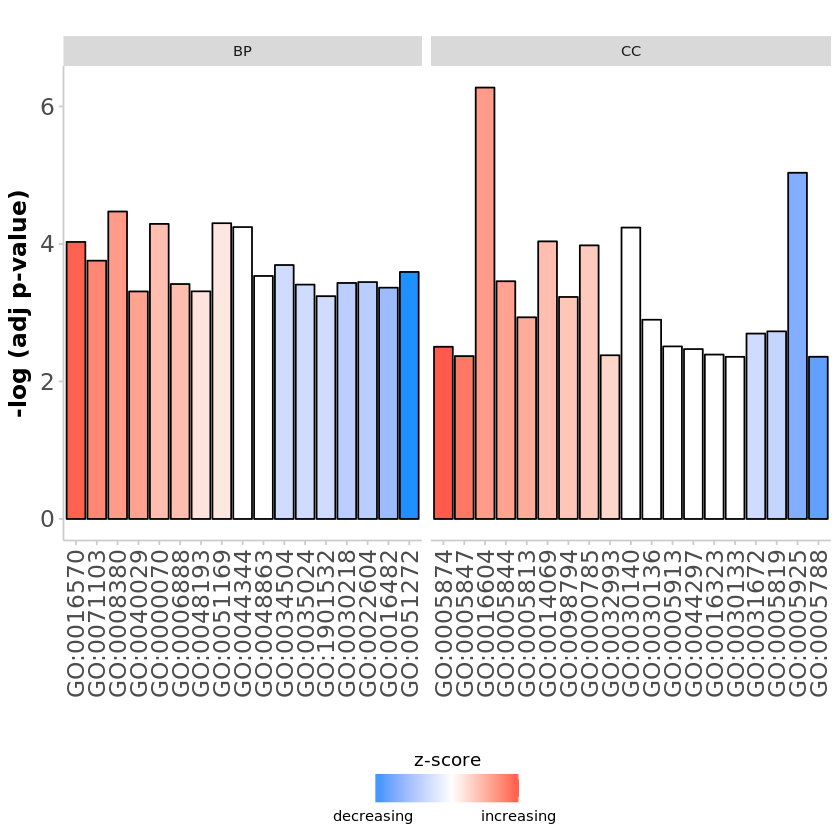

===  CORTEX.MetaDE.ApoE3  ===

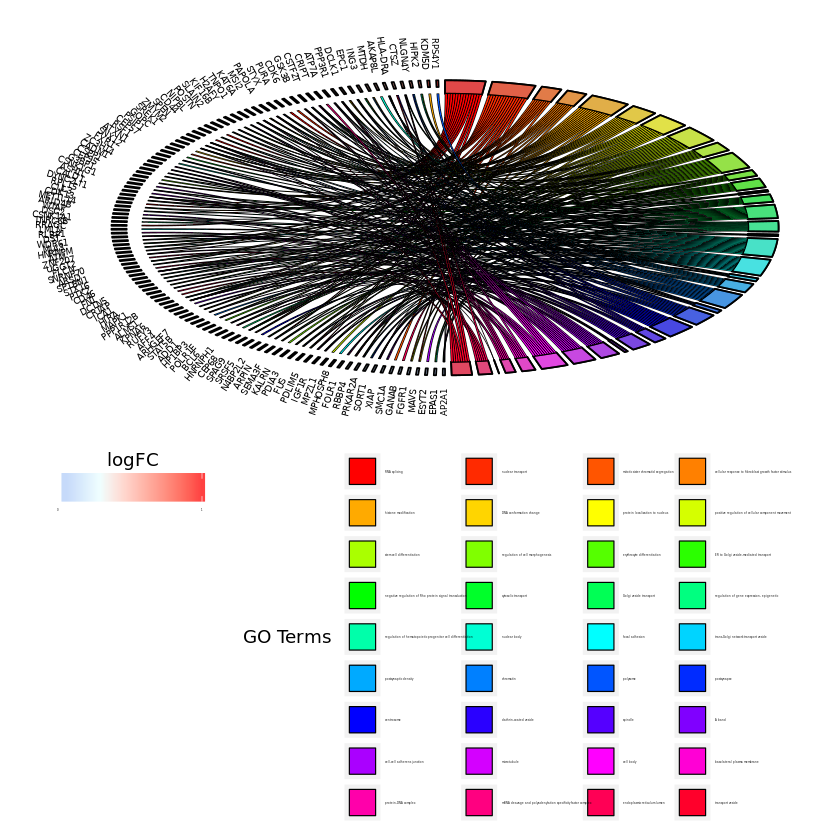

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 21 rows containing missing values (geom_point)."

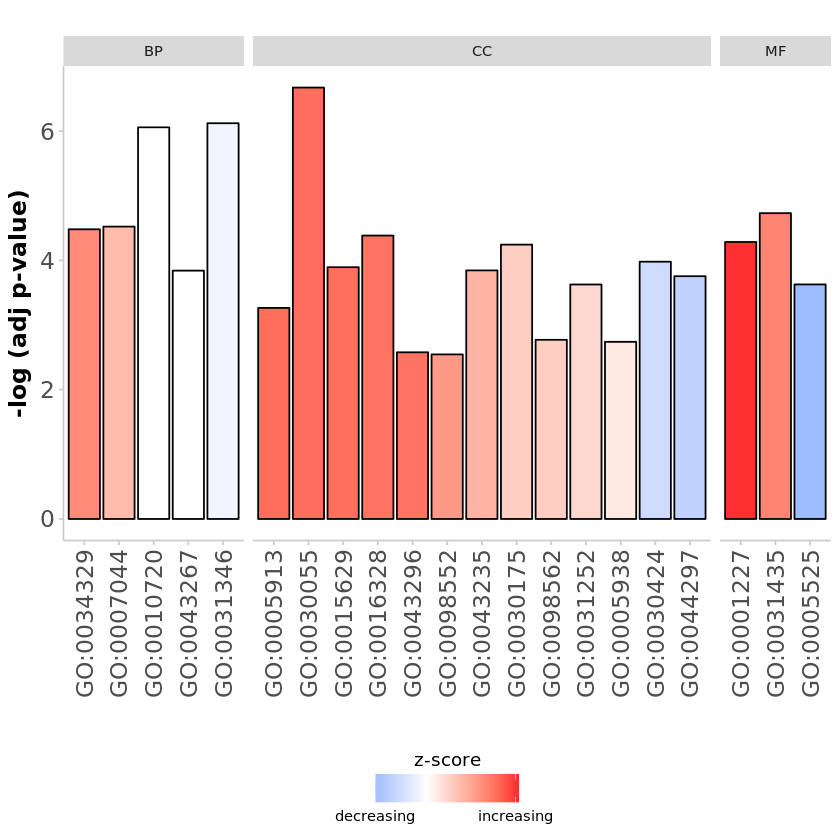

===  CORTEX.MetaDE.ApoE4  ===

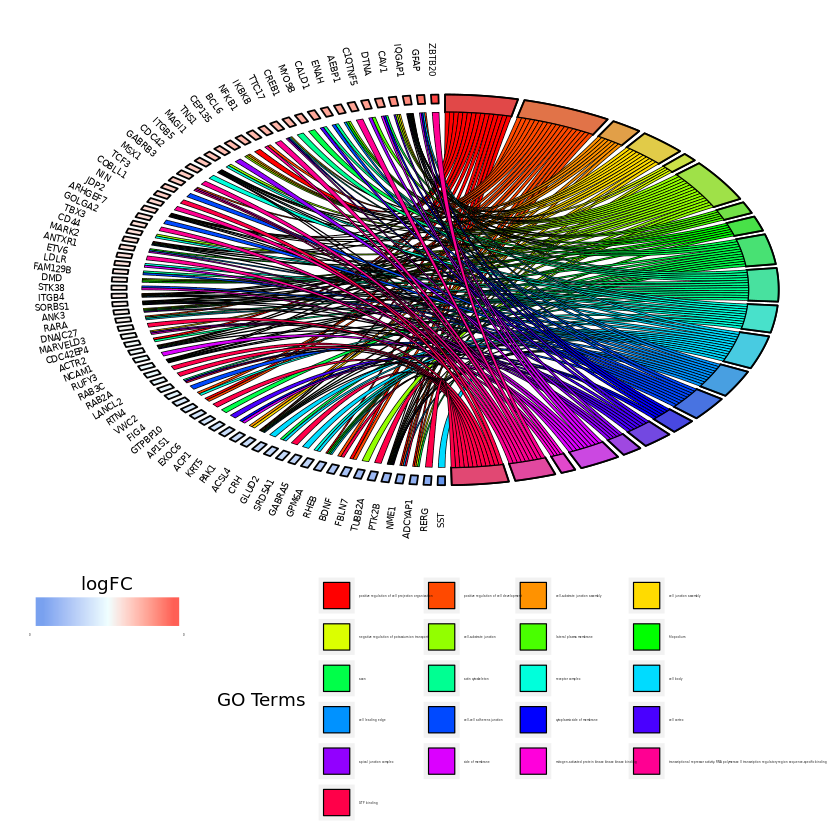

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 22 rows containing missing values (geom_point)."

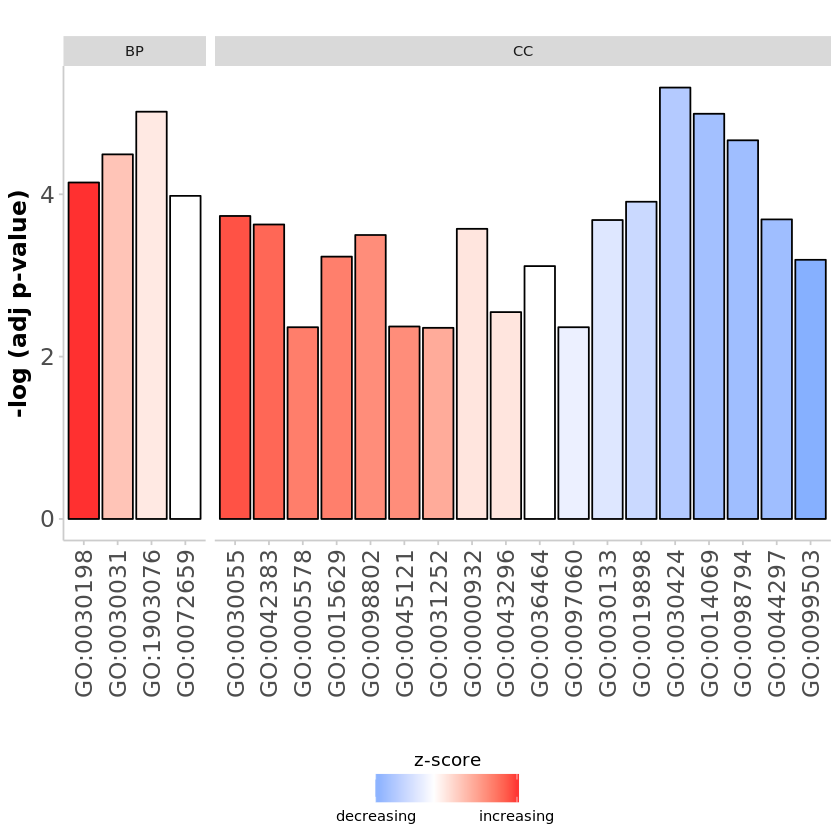

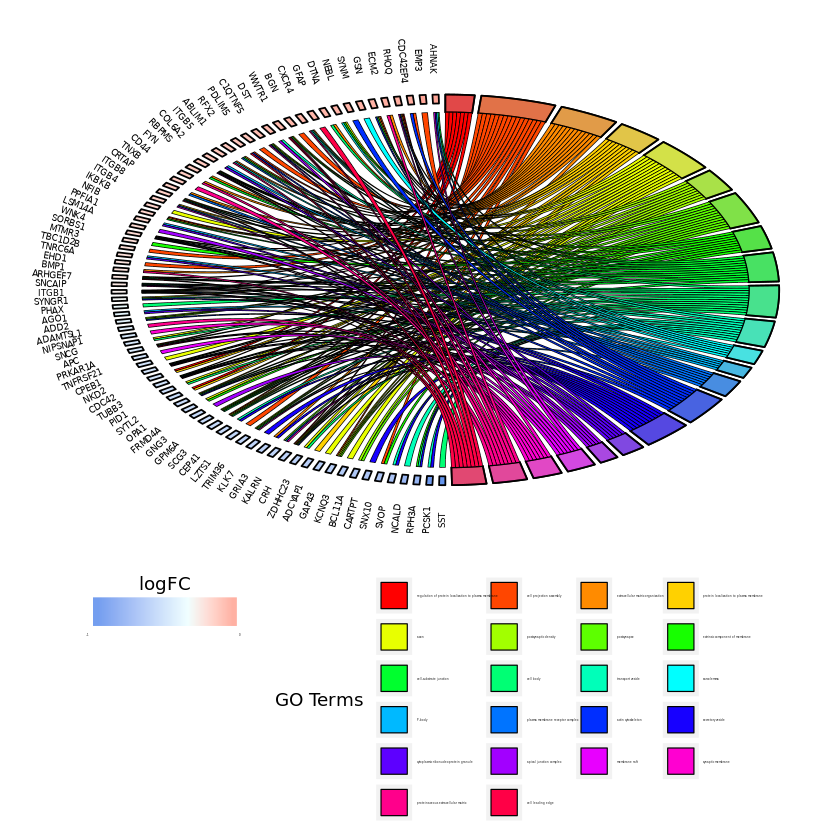

In [73]:
for (i in 1:length(result.list)){
#i=3
    filename=sapply(strsplit(infiles[i],"/"), tail, 1)
    filename=sapply(strsplit(filename,"-"), tail, 1)
    filename=gsub('\\.csv', '', filename)
    cat("=== ",filename," ===")
    
    # prepare enrichment table to plot
    result.go=result.list[[i]][, c(1,2,3,9,12)]
    result.go= result.go[result.go$category %in% categories.toplot ,]
    names(result.go)=c("Category","ID","Term","adj_pval","Genes") 
    result.go$Genes=gsub(';', ',', result.go$Genes)
    #print(head(result.go,n=3))

    # Generate the plotting object
    circ <- circle_dat(result.go, genedf.list[[i]])
    # Reduce redundant terms with a gene overlap >= 0.85...
    reduced_circ <- reduce_overlap(circ, overlap = 0.85)
    # dataframe with all genes in selected categories after reducing
    reduced_circ_genes=circ[circ$term %in% reduced_circ$term ,]
    write.table(reduced_circ_genes,paste(outpath,paste(filename,"GOdataframe",sep="_"),sep="/"))
    
    # bar plot
    print(GOBar(reduced_circ_genes, display = 'multiple'))
    
    # chord plot 
    reduced_logfc=unique(reduced_circ_genes[, c(5,6)]) # extract genes and logFC from circ object
    reduced_chord_genes <- chord_dat(reduced_circ_genes) # logFC column is missing
    reduced_chord_genes.logfc=merge(reduced_chord_genes,reduced_logfc,by.x="row.names",by.y="genes")
    reduced_chord_genes.logFC=reduced_chord_genes.logfc[ ,-c(1)]
    rownames(reduced_chord_genes.logFC)= reduced_chord_genes.logfc[ ,1]
    
    print(GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 1.8,process.label=1.5,border.size = 0.2))
    # to pdf
    #pdf(file=paste(outpath,paste(filename,"goplot.pdf",sep="_"),sep="/"))
    #GOBar(reduced_circ_genes, display = 'multiple')
    #GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 2.8,process.label=1.5,border.size = 0.2)
    #dev.off()

    
}    

ApoE2 not legible even changing parameters

===  CORTEX.MetaDE.ApoE2  ===

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 36 rows containing missing values (geom_point)."

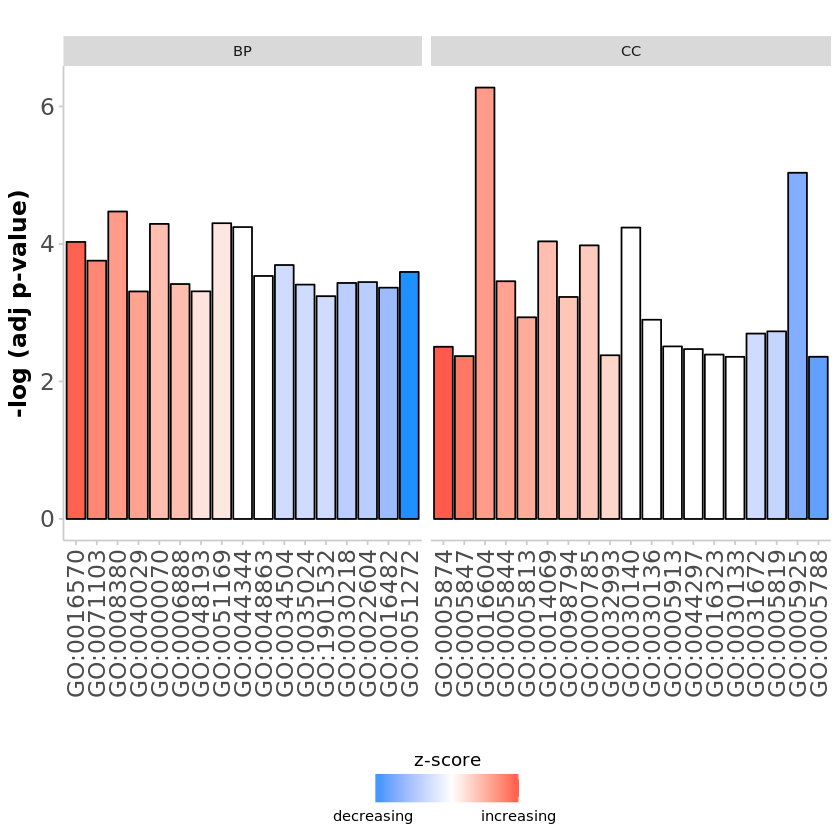

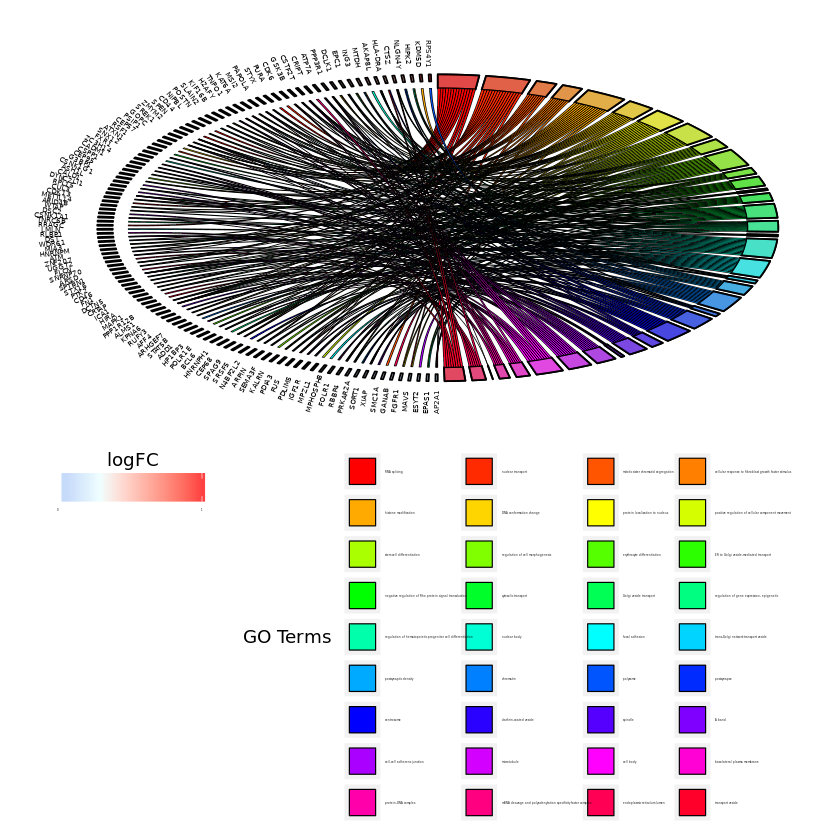

In [78]:
#for (i in 1:length(result.list)){
i=1
    filename=sapply(strsplit(infiles[i],"/"), tail, 1)
    filename=sapply(strsplit(filename,"-"), tail, 1)
    filename=gsub('\\.csv', '', filename)
    cat("=== ",filename," ===")
    
    # prepare enrichment table to plot
    result.go=result.list[[i]][, c(1,2,3,9,12)]
    result.go= result.go[result.go$category %in% categories.toplot ,]
    names(result.go)=c("Category","ID","Term","adj_pval","Genes") 
    result.go$Genes=gsub(';', ',', result.go$Genes)
    #print(head(result.go,n=3))

    # Generate the plotting object
    circ <- circle_dat(result.go, genedf.list[[i]])
    # Reduce redundant terms with a gene overlap >= 0.85...
    reduced_circ <- reduce_overlap(circ, overlap = 0.85)
    # dataframe with all genes in selected categories after reducing
    reduced_circ_genes=circ[circ$term %in% reduced_circ$term ,]
    #write.table(reduced_circ_genes,paste(outpath,paste(filename,"GOdataframe",sep="_"),sep="/"))
    
    # bar plot
    print(GOBar(reduced_circ_genes, display = 'multiple'))
    
    # chord plot 
    reduced_logfc=unique(reduced_circ_genes[, c(5,6)]) # extract genes and logFC from circ object
    reduced_chord_genes <- chord_dat(reduced_circ_genes) # logFC column is missing
    reduced_chord_genes.logfc=merge(reduced_chord_genes,reduced_logfc,by.x="row.names",by.y="genes")
    reduced_chord_genes.logFC=reduced_chord_genes.logfc[ ,-c(1)]
    rownames(reduced_chord_genes.logFC)= reduced_chord_genes.logfc[ ,1]
    
    print(GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.25, gene.size = 1.5,process.label=1.5,border.size = 0.2))
    # to pdf
    #pdf(file=paste(outpath,paste(filename,"goplot.pdf",sep="_"),sep="/"))
    #GOBar(reduced_circ_genes, display = 'multiple')
    #GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 2.8,process.label=1.5,border.size = 0.2)
    #dev.off()

    


===============

In [83]:
# prepare enrichment table to plot
    result.go=result.list[[1]][, c(1,2,3,9,12)]
    result.go= result.go[result.go$category %in% categories.toplot ,]
    names(result.go)=c("Category","ID","Term","adj_pval","Genes") 
    result.go$Genes=gsub(';', ',', result.go$Genes)
    #print(head(result.go,n=3))

    # Generate the plotting object
    circ <- circle_dat(result.go, genedf.list[[1]])
    # Reduce redundant terms with a gene overlap >= 0.85...
    reduced_circ <- reduce_overlap(circ, overlap = 0.85)
    # dataframe with all genes in selected categories after reducing
    reduced_circ_genes=circ[circ$term %in% reduced_circ$term ,]

In [86]:
genedf.list[[1]][genedf.list[[1]]$ID=="HLA-DRA" ,]

,ID,logFC
72,HLA-DRA,0.5294408


In [84]:
reduced_circ_genes[reduced_circ_genes$genes=="HLA-DRA" ,]

,category,ID,term,count,genes,logFC,adj_pval,zscore
476,CC,GO:0030136,clathrin-coated vesicle,6,HLA-DRA,0.5294408,0.001265322,0
570,CC,GO:0030133,transport vesicle,8,HLA-DRA,0.5294408,0.004385403,0
